# Projekti 1: Depolarisoiva kanava

Tässä projektissa toteutamme **depolarisoivan kanavan** Qiskitillä ja testaamme sitä simulaattorissa tilatomografiamenetelmällä – ja valinnaisesti myös oikealla laitteella. 

Depolarisoiva kanava on yksi yleisimmistä kubittidekoherenssin malleista sen kivojen symmetriaominaisuuksien ansiosta. Voimme kuvailla sitä näin: todennaköisyydellä $p$ kubitti pysyy koskemattomana, kun taas todennäköisyydellä $1-p$ tapahtuu virhe. Virhe voi olla bitin kääntyminen, jota kuvaa operaattorin $\sigma_x$ toiminta, faasin kääntyminen, jota kuvaa operaattorin $\sigma_z$ toiminta tai molemmat, jota kuvaa operaattorin $\sigma_y$ toiminta. Kun Markovin avoin kvanttisysteemi altistetaan depolarisoivalle taustakohinalle, sen dynaaminen kuvaus voidaan kirjoittaa: 

\begin{align}
\Phi_t \rho_S = \left[1-\frac 3 4 p(t)\right] \rho_S + \frac{p(t)}{4} \sum_i \sigma_i \rho_S \sigma_i,
\end{align}

jossa $i=x,y,z$ ja $p(t)=1 - e^{-\gamma t}$, jossa $\gamma$ on Markovin hajoamisnopeus. 

Depolarisoiva kanava voidaan toteuttaa millä tahansa arvolla $p\equiv p(t) \in [0, 1]$ alla olevan kuvan mukaisella piirillä. 
Kolme apukubittia on valmistettu tilaan  $| \psi_\theta \rangle = \cos \theta/2 | 0 \rangle + \sin \theta/2 | 1 \rangle$,
ja ne toimivat kontrollina kontrolloidulle $X$-portille (CNOT), kontrolloidulle $Y$-portille ja kontrolloidulle  $Z$-portille.
Kutakin näistä porteista käytetään siten todennäköisyydellä $\sin^2 \theta/2$.

Kiertokulma $\theta$ täytyy valita niin, että kutakin porteista käytetään todennäköisyydellä $p$. 
Huomaa, että jos käytetään ensin porttia $X$ ja sitten porttia $Y$, lopputulos on sama kuin jos käytettäisi pelkkää porttia $Z$. 
Tuloksena saadaan yhtälö, joka sitoo $\theta$:n arvon $p$:n arvoon: 

\begin{equation}
    \sin^2 \frac \theta 2 \cos^4\frac\theta2 + \sin^4 \frac\theta 2 \cos^2 \frac \theta 2 = \frac p 4,
\end{equation}
Tällä on ratkaisu $\theta(p) = \frac 12 \arccos(1 - 2 p)$.

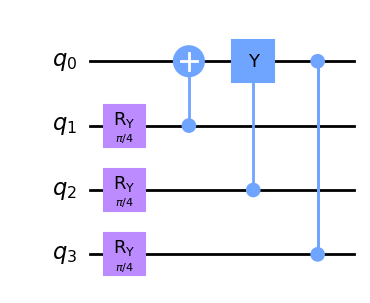

In [3]:
####################################
#       Depolarizing channel       #
####################################

from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

# Quantum register
q = QuantumRegister(4, name="q")

# Quantum circuit
depolarizing = QuantumCircuit(q)

# Depolarizing channel acting on q_2
## Qubit identification
system = 0
a_0 = 1
a_1 = 2
a_2 = 3

## Define rotation angle
theta = np.pi/4

## Construct circuit
depolarizing.ry(theta, q[a_0])
depolarizing.ry(theta, q[a_1])
depolarizing.ry(theta, q[a_2])
depolarizing.cx(q[a_0], q[system])
depolarizing.cy(q[a_1], q[system])
depolarizing.cz(q[a_2], q[system])

# Draw circuit
depolarizing.draw(output='mpl')

## Tehtävä 1 (1p)

Luo funktio, joka palauttaa kvanttipiirin, joka toteuttaa depolarisoivan kanavan parametrilla $p$ `system`-kubittiin käyttäen kolmea apukubittia `ancillae = [a1, a2, a3]`.

In [ ]:
def depolarizing_channel(q, p, system, ancillae):
    """Returns a QuantumCircuit implementing depolarizing channel on q[system]
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        p (float): the probability for the channel between 0 and 1
        system (int): index of the system qubit
        ancillae (list): list of indices for the ancillary qubits
        
    Returns:
        A QuantumCircuit object
    """
    
    # Write the code here...

## Tehtävä 2 (1p)
Luo piiri `prepare_state` joka valmistaa kubitin `system` alkutilaan, jossa populaatiot ja koherenssit poikkeavat nollasta (sekä reaali- että imaginääriosat).

In [ ]:
# Let's fix the quantum register and the qubit assignments

# We create the quantum circuit
q = QuantumRegister(4, name='q')

# Index of the system qubit
system = 1

# Indices of the ancillary qubits
ancillae = [0, 2, 3]

## Tehtävä 3 (4p)
Valmistele tilatomografiakoe, jolla analysoimme piirin ja depolarisoivan kohinan tuottamaa tilaa. Tässä rekonstruoimme tiheysmatriisit ja tilojen [fideliteetit](https://en.wikipedia.org/wiki/Fidelity_of_quantum_states).

1. Eri arvoille $p \in [0, 1]$: 

    1. A) Yhdistä kvanttipiirissä `prepare_state` ja `depolarizing_channel`. 

    2. Valmistele ja aja `StateTomography`, joka löytyy kirjastosta `qiskit_experiments.library.tomography`  tehdäksesi tomografian **vain** `system`-kubitille simulaattoria käyttäen. 

      - Laske myös fideliteetti verrattuna `system`-kubitin tilaan `prepare_state` (eli ilman depolarisoivaa kanavaa). Saatat tarvita toimintoa [`partial_trace`](https://qiskit.org/documentation/apidoc/quantum_info.html#qiskit.quantum_info.partial_trace) `qiskit.quantum_info`:sta. 

      - Laske virherajat fideliteeteille [bootstrapping-menetelmällä](https://en.wikipedia.org/wiki/Bootstrapping_(statistics%29). Käytä tätä varten `StateTomographyAnalysis`-kirjastosta `qiskit_experiments.library.tomography` joillakin argumenteilla ja käytä näitä `StateTomography`:ssa.

    3. Kokoa tiheysmatriisit, fideliteetit ja fideliteettien virheet.
<br/><br/>
2. Kuvaile lyhyesti omin sanoin, mitä `StateTomography` tekee. Mitä täytyy mitata? Miten varmistamme, että tiheysmatriisi on fysiikalinen? (Mahdollisesti hyödyllisiä linkkejä: [Quantum State Tomography](https://qiskit.org/ecosystem/experiments/manuals/verification/state_tomography.html) ja [Open Quantum Systems with Qiskit](https://matteoacrossi.github.io/oqs-jupyterbook/preliminaries.html).) 

In [ ]:
# For example, let's consider 10 equally spaced values of p
import numpy as np
p_values = np.linspace(0, 1, 10)

## Tehtävä 4 (4p)
1.  Määritä numeerisesti eksakti tiheysmatriisi `system`-kubitille depolarisoivan kanavan jälkeen $p$:n funktiona.
2. Piirrä kuvaajat $\rho_{00}$:n, $\rho_{11}$:n, $\mathrm{Re}(\rho_{01})$:n ja $\mathrm{Im}(\rho_{01})$:n arvoista $p$:n funktiona ja vertaa niitä analyyttisiin ennusteisiin/odotuksiin.
3. Määritä numeerisesti `system`-kubitin eksaktit fideliteetit depolarisoivan kanavan jälkeen $p$:n funktiona. 
4. Piirrä kuvaajat `system`-kubitin eksakteista ja simuloiduista fideliteeteistä verrattuna alkutilaan $p$:n funktiona. Lisää 3. tehtävässä lasketut virherajat kuvaajiin. 

Datapisteiden äärellisestä määrästä johtuvia tilastollisia virheitä lukuun ottamatta simulaation tuottamien pisteiden tulisi olla lähellä analyyttistä ennustetta. Fideliteettien osalta virherajat kattavat yhden keskihajonnan (~68 %). 

In [ ]:
import matplotlib.pyplot as plt

## Valinnainen lisätehtävä 
Suorita kaikki yllä olevat tehtävät todellisella laitteella melunvaimennuksen kanssa ja vertaa tuloksia simulaatioon. Tätä varten voit käyttää [`MitigatedStateTomography`:a](https://qiskit.org/ecosystem/experiments/stubs/qiskit_experiments.library.tomography.MitigatedStateTomography.html#qiskit_experiments.library.tomography.MitigatedStateTomography) `StateTomography`:n sijaan. 

Huomaa, että `MitigatedTomographyAnalysis` toimii hieman eri tavalla kuin `StateTomographyAnalysis`. Jos tulee ongelmia, kokeile tarjota analyysiluokkaa ajaessasi tomografiakoetta sen sijaan, että teet sen alustaessasi koetta. 

Voit hankkia todellisen laitteen taustaohjelman seuraavalla koodilla (primitiivit, kuten `Sampler`, ovat suhteellisen uusia, joten niitä ei tueta vielä `qiskit-experiments`-ympäristössä). Varmista lopuksi, että olet luonut ja tallentanut [IBM Quantum](https://quantum-computing.ibm.com/)-tilisi! 

In [ ]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()
# Replace ibm_brisbane with the backend you want to run this on
backend = provider.get_backend("ibm_brisbane")